## DESARROLLO DEL MODELO Covid-19 infección en Ecuador.

### Formulacion del problema

Esta simulacion se usara para presentar el avance de la enfermedad covid-19 en el ecuador, donde se busca predecir a travez de una regresion lineal y logaritmica el avance de la enfermedad a travez de datos que se tiene de personas que tuvieron la enfermedad y las personas que se han recuperado. Los datos recopildos sivern para poder realizar una simulacion del avance de la enfermedad y predecir el comportamiento y avance de la misma.

### Definición del sistema
Se procede a simular el avance de la enfermedad covid-19 dentro del ecuador. Para este analisis se utilizaran datos recopilados de acuerdo a fechas sobre el numero de casos y numero de muertos que se dieron desde el mes de marzo.


In [6]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error,r2_score
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from xml.dom import minidom

In [7]:
# trabajaremos en base al dataset de contagios en el Ecuador
from datetime import datetime,timedelta
url = 'owid-covid-data.csv'
df = pd.read_csv(url).fillna(0)
df = df[df['location'].isin(['Ecuador'])]
df = df.loc[:,['date','total_cases']]
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01",FMT)).days)
x=np.arange(1,len(df)+1,1)
y=np.array(df.values[:,1], dtype='float')

Numero de Contagios Actuales:
185944.0


Text(0, 0.5, 'Número Casos')

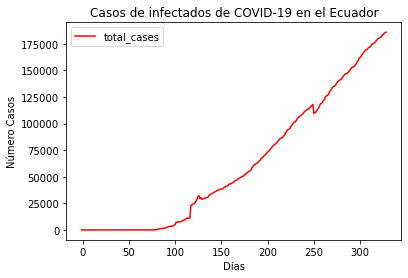

In [8]:
print("Numero de Contagios Actuales:")
print(y[len(y)-1])
ax = df.plot(x ='date', y='total_cases',color='red',title='Casos de infectados de COVID-19 en el Ecuador')
ax.set_xlabel("Días")
ax.set_ylabel("Número Casos")

### Modelo Lineal

In [9]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [611.28161157]
Independent term: 
 -37568.51318839502


In [10]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" voy a obtener por en el dia 100,
# según nuestro modelo, hacemos:
y_prediccion = regr.predict([[100]])
print('Total de casos', int(y_prediccion))

Total de casos 23559


[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]


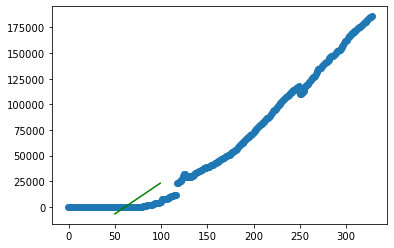

In [11]:
#Graficar
plt.scatter(x, y)
x_real = np.array(range(50, 100))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

### Modelo Logico

(array([-162616.15700986,   46769.46044512]), array([[ 1.24836634e+08, -2.49436309e+07],
       [-2.49436309e+07,  5.18506961e+06]]))


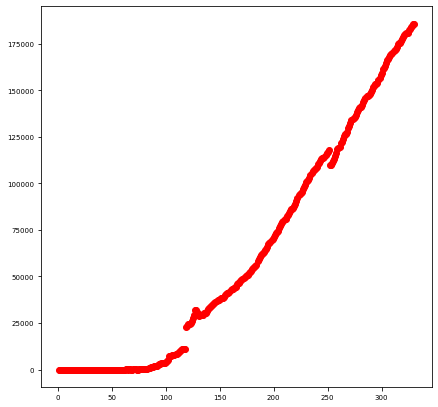

In [16]:
from sklearn.linear_model import LogisticRegression
def modelo_logistico(x,a,b):
    return a+b*np.log(x)
x=np.arange(1,len(df)+1,1)
y=np.array(df.values[:,1])
exp_fit = curve_fit(modelo_logistico,x,y)
pred_x = list(range(min(x),max(x)+7))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=7)
plt.scatter(x,y,label="Datos Reales Casos",color="red")
val = [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
#plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico",color="black
#plt.legend()t(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

In [17]:
# Implementar
# Filtrar los datos de ECuador
df = pd.read_csv('owid-covid-data.csv').fillna(0)
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)]
ndf

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
15767,ECU,South America,Ecuador,2020-03-01,1.0,1.0,0.143,0.0,0.0,0.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
15768,ECU,South America,Ecuador,2020-03-02,6.0,5.0,0.857,0.0,0.0,0.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
15769,ECU,South America,Ecuador,2020-03-03,7.0,1.0,1.000,0.0,0.0,0.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
15771,ECU,South America,Ecuador,2020-03-05,10.0,3.0,1.429,0.0,0.0,0.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
15772,ECU,South America,Ecuador,2020-03-06,13.0,3.0,1.857,0.0,0.0,0.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16031,ECU,South America,Ecuador,2020-11-20,183246.0,996.0,819.000,13073.0,21.0,18.143,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
16032,ECU,South America,Ecuador,2020-11-21,183840.0,594.0,738.000,13095.0,22.0,16.857,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
16033,ECU,South America,Ecuador,2020-11-22,184876.0,1036.0,749.857,13139.0,44.0,20.286,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
16034,ECU,South America,Ecuador,2020-11-23,185643.0,767.0,764.000,13201.0,62.0,27.571,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752


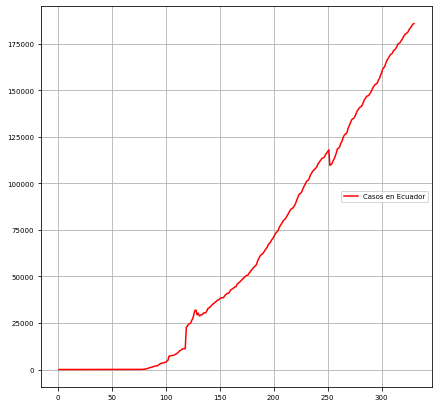

In [23]:
# Graficar los casos y muertes por covid en Ecuador
plt.plot(x,y,label='Casos en Ecuador', color='red')
#plt.plot(x,y,label='Muertes en Ecuador', color='blue')
plt.grid(True)
plt.legend(loc=5)

### Criterio personal (politico, economico y social de la situacion)

La economía ecuatoriana recibió una serie de fuertes golpes externos desde 2015 y estaba todavía padeciendo las consecuencias del paro nacional y del movimiento de protesta de octubre pasado que permitió evitar el alza súbita de mas de 100% en los precios de los hidrocarburos. Con la crisis global del coronavirus, cayeron los precios del petróleo ecuatoriano a 15 dólares, un commodity del cual el país depende, y a lo que deben sumarse los problema de una economía dolarizada (es decir, que no puede devaluar y que está obligado a obtener la moneda estadounidense mediante exportaciones). Pero ahora los ecuatorianos ven erosionado, además, el sistema de protección social paralelo que representan las remesas de los emigrados. Los migrantes ecuatorianos en el mundo, principalmente en Estados Unidos, España y Italia, deben hacer frente a sus propias emergencias.


